<div style="background-color:black;">
<div style="background-color:grey; height:10px; border-radius:40px;"></div>

# <center style="color:cyan; font-weight:bold;"> Gyalpozhing College of Information Technology </center>

#### <center style="color:green;font-weight:bold;"> Machine Learning Project </center>

## <center style="color:white; font-weight:bold;"> Stroke Diagnosis </center>

<center><img style="height:60%;" src="strokeImage.jfif"/></center>

#### <center style="color:green;font-weight:bold;"> CAE 307 - Data Science </center>

<div style="background-color:grey; height:10px; border-radius:40px;"></div>
</div>

<div style="color:white;background-color:black;">

## About Dataset

* `id`: unique identifier
* `gender`: "Male", "Female" or "Other"
* `age`: age of the patient
* `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* `ever_married`: "No" or "Yes"
* `work_type`: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
* `Residence_type`: "Rural" or "Urban"
* `avg_glucose_level`: average glucose level in blood

* `bmi`: body mass index

* `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*

* `stroke`: 1 if the patient had a stroke or 0 if not

</div>

<center style="background-color:red; border-radius:20px;height:27px;font-weight:bold;">DATA EXPLORATION<center>

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

### Data Loading

In [2]:
df = pd.read_csv("my_stroke.csv")
df = df.drop(columns=["bmi"])
df["smoking_status"] = df["smoking_status"].replace({"never smoked":"Never", "formerly smoked":"Smoked Before", "smokes":"Smokes"})
df["hypertension"] = df["hypertension"].replace({1.0:1, 0.0:0})
df["heart_disease"] = df["heart_disease"].replace({1.0:1, 0.0:0})

df.head()

,id,hypertension,heart_disease,ever_married,Residence_type,smoking_status,stroke,avg_glucose_level,work_type,age,gender
0,12109,1.0,0.0,Yes,Rural,Never,1,175.270,Private_job,20,Male
1,11111,1.0,0.0,Yes,Urban,Smoked Before,1,189.427,Private_job,92,Male
2,44978,0.0,0.0,Yes,Rural,Smoked Before,0,205.948,Gove_job,22,Female
3,41241,0.0,0.0,Yes,Urban,Smoked Before,1,116.115,Private_job,49,Female
4,64132,0.0,1.0,Yes,Rural,Unknown,1,147.898,Private_job,48,Female


In [3]:
df["work_type"] = df["work_type"].replace({"Private_job":"Private Job", "Gove_job":"Goverment Job", "Self_employed":"Self Employed"})

df.loc[913:913,['ever_married']] = "No"

df.loc[6:6, ["Residence_type"]] = "Rural"

In [4]:
df.smoking_status.value_counts()

Never            525
Smoked Before    468
Unknown          317
Smokes           298
Name: smoking_status, dtype: int64

In [5]:
# bmi = []
# glu = []
# work = []
# age = []
# gender = []
# for i in range(len(df)):
#     bmi.append(np.round(np.random.uniform(12.1, 52.3), 3))
#     glu.append(np.round(np.random.uniform(17.2, 274.98), 3))
#     work.append(np.random.choice(["Gove_job", "Private_job", "Self_employed"]))
#     age.append(np.random.randint(20, 103))
#     gender.append(np.random.choice(["Male", "Female"]))
# len(bmi)
# df["bmi"] = bmi
# df["bmi"] = df["bmi"].astype("float")
# df["avg_glucose_level"] = glu
# df["work_type"] = work
# df["age"] = age
# df["gender"] = gender
# df.head()

### Count the number of missing values in each column

In [6]:
df.isna().sum()

id                   0
hypertension         2
heart_disease        1
ever_married         0
Residence_type       3
smoking_status       6
stroke               0
avg_glucose_level    2
work_type            1
age                  0
gender               2
dtype: int64

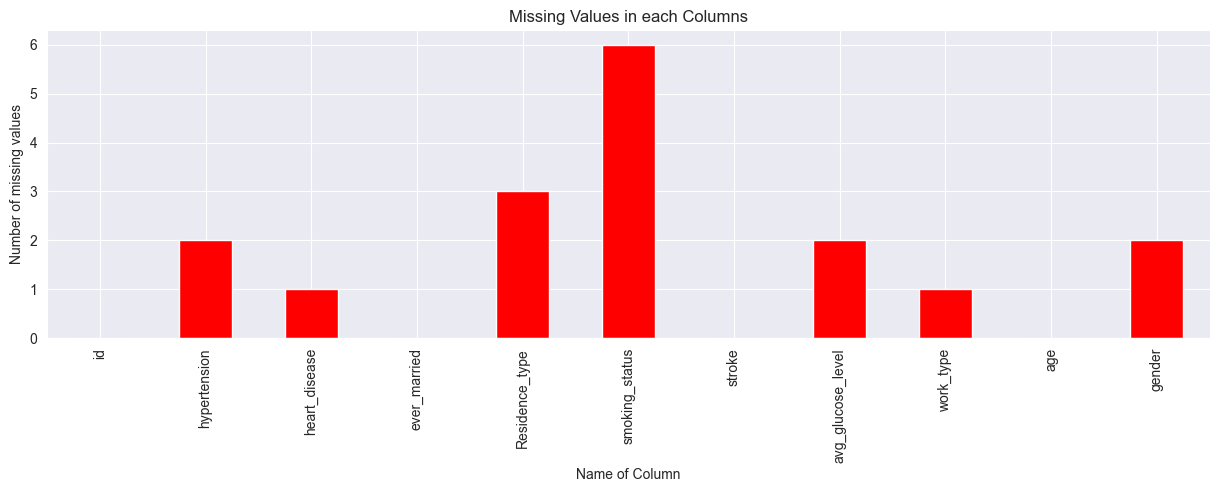

In [7]:
# Plot the missing values in each columns
from matplotlib.pyplot import annotate

missing_values = pd.DataFrame(df.isna().sum())
missing_values.plot(kind="bar",
                    title="Missing Values in each Columns",
                    xlabel="Name of Column",
                    ylabel="Number of missing values",
                    color="red",
                    figsize=(15, 4),
                    legend=False);

### Statistical Summary of the dataframe

In [8]:
df.describe()

,id,hypertension,heart_disease,stroke,avg_glucose_level,age
count,1614.000000,1612.000000,1613.000000,1614.000000,1612.000000,1614.000000
mean,36252.462825,0.205335,0.138252,0.498141,143.809671,60.035936
std,21293.572552,0.404072,0.345271,0.500152,74.101516,23.978885
min,84.000000,0.000000,0.000000,0.000000,17.519000,20.000000
25%,17014.500000,0.000000,0.000000,0.000000,80.290250,39.000000
50%,36058.000000,0.000000,0.000000,0.000000,142.870000,59.000000
75%,54850.250000,0.000000,0.000000,1.000000,206.902000,81.000000
max,72918.000000,1.000000,1.000000,1.000000,274.961000,102.000000


### Concise Summary of the dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1614 non-null   int64  
 1   hypertension       1612 non-null   float64
 2   heart_disease      1613 non-null   float64
 3   ever_married       1614 non-null   object 
 4   Residence_type     1611 non-null   object 
 5   smoking_status     1608 non-null   object 
 6   stroke             1614 non-null   int64  
 7   avg_glucose_level  1612 non-null   float64
 8   work_type          1613 non-null   object 
 9   age                1614 non-null   int64  
 10  gender             1612 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 138.8+ KB


<center style="background-color:red; border-radius:20px;height:27px;font-weight:bold;">FEATURE ENGINEERING<center>

### Selecting `Features` and `Target` variables

In [10]:
target = df[['stroke']]
features = df.drop(columns=["id", "stroke"], axis=1)

### Selecting Categorical Feautures

In [11]:
categorical = features.select_dtypes(include=["object", "bool"])
categorical.head()

,ever_married,Residence_type,smoking_status,work_type,gender
0,Yes,Rural,Never,Private Job,Male
1,Yes,Urban,Smoked Before,Private Job,Male
2,Yes,Rural,Smoked Before,Goverment Job,Female
3,Yes,Urban,Smoked Before,Private Job,Female
4,Yes,Rural,Unknown,Private Job,Female


### Use Mode(`most_frequent`) to impute Categorical missing values

In [12]:
from sklearn.impute import SimpleImputer

cat_impute = SimpleImputer(strategy="most_frequent")

cat_data = cat_impute.fit_transform(categorical)
cat_df = pd.DataFrame(cat_data, columns=categorical.columns)

### Display the Categorical Features after imputing missing values

In [13]:
cat_df.head()

,ever_married,Residence_type,smoking_status,work_type,gender
0,Yes,Rural,Never,Private Job,Male
1,Yes,Urban,Smoked Before,Private Job,Male
2,Yes,Rural,Smoked Before,Goverment Job,Female
3,Yes,Urban,Smoked Before,Private Job,Female
4,Yes,Rural,Unknown,Private Job,Female


### Selecting Numerical Features

In [14]:
numericals = features.select_dtypes(include=["int", "float"])
numericals.head()

,hypertension,heart_disease,avg_glucose_level,age
0,1.0,0.0,175.270,20
1,1.0,0.0,189.427,92
2,0.0,0.0,205.948,22
3,0.0,0.0,116.115,49
4,0.0,1.0,147.898,48


### Use `mean` to impute numerical missing values

In [15]:
num_impute = SimpleImputer(strategy="mean")

num_data = num_impute.fit_transform(numericals)
num_df = pd.DataFrame(num_data, columns=numericals.columns)

### Display the Numerical features aftering imputing missing values

In [16]:
num_df.head()

,hypertension,heart_disease,avg_glucose_level,age
0,1.0,0.0,175.270,20.0
1,1.0,0.0,189.427,92.0
2,0.0,0.0,205.948,22.0
3,0.0,0.0,116.115,49.0
4,0.0,1.0,147.898,48.0


### Saving the Cleaned dataset.

In [17]:
# cleanedDf = pd.concat([num_df, cat_df, target], axis=1)
# cleanedDf.to_csv("CleanedStrokeData.csv", index=False)
# cleanedDf.ever_married.value_counts()

### Categorical Feature Encoding - `One-Hot Encoder` or `pd.get_dummies()`

* Since the features are **Nomial**.
* **pd.get_dummies()** to create dummy variables for **Nomial** features.

In [ ]:
encoded_cat = pd.get_dummies(cat_df)
encoded_cat

### `Feature Scaling` for Numerical Features. - `Robust Scaler`

* `Robust Scaler` is robust to handle outliers in the features as well.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = scaler.fit_transform(num_df)
robust_numericdf = pd.DataFrame(scaled_data, columns=num_df.columns)
robust_numericdf

### Combining both the **Categorical** and **Numerical** features together.

In [ ]:
X = pd.concat([encoded_cat, robust_numericdf], axis=1)
X.head()

### Target Variable

In [ ]:
y = target
y

### Splitting the Dataset into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print()
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

<center style="background-color:red; border-radius:20px;height:27px;font-weight:bold;">CLASSIFICATION ALGORITHMS<center>

* `Logistic Regression`

* `K-Nearest Neighbors`

* `Decision Tree`

* `Support Vector Machines`

* `Random Forest Classifier`

*****

#### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(lr_pred[:10]).values.tolist()[:10])

#### Confusion Matrix for `Logistic Regression`

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title, color):
    
    plt.figure(figsize=(14, 12))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap=color)

    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    
    plt.show()

In [ ]:
plot_confusion_matrix(y_test, lr_pred, "Confustion Matrix - Logistic Regression", "Greens_r")

In [ ]:
# Calculate the Accuracy of the Logistic Regression
from sklearn.metrics import accuracy_score

lr_acc = round(accuracy_score(y_test, lr_pred), 4)

print("Logistic Regression Accuracy:", lr_acc)

### **2. K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

# Make a prediction
knn_pred = knn.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(knn_pred[:10]).values.tolist()[:10])

#### Plot Confustion Matrix for `K-Nearest Neighbors`

In [ ]:
plot_confusion_matrix(y_test, knn_pred, "Confusion Matrix - K-Nearest Neighbors", "Blues")

In [ ]:
### Calculate the Accuracy of K-Nearest Neighbors model
knn_acc = round(accuracy_score(y_test, knn_pred), 4)

print("K-Nearest Neighbors Accuracy:", knn_acc)

### **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

# Make a predictions
tree_pred = tree.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(tree_pred[:10]).values.tolist()[:10])

#### Plot Confusion Matrix for `Decision Tree`

In [ ]:
plot_confusion_matrix(y_test, tree_pred, "Confusion Matrix - Decision Tree", "cool_r")

In [ ]:
### Calculate the Accuracy of Decision Tree model
tree_acc = round(accuracy_score(y_test, tree_pred), 4)

print("Decision Tree Accuracy:", tree_acc)

### **4. Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train, y_train)

# Make a prediction
svm_pred = svm.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(svm_pred[:10]).values.tolist()[:10])

#### Plot Confustion Matrix for `Support Vector Machines(SVM)`

In [ ]:
plot_confusion_matrix(y_test, svm_pred, "Confustion Matrix - Support Vector Machines(SVM)", "terrain")

In [ ]:
### Calculate the Accuracy of Decision Tree model
svm_acc = round(accuracy_score(y_test, svm_pred), 4)

print("Support Vector Machines(SVM) Accuracy:", svm_acc)

### **5. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(x_train, y_train)

# Make a prediction
forest_pred = forest.predict(x_test)

print("Actual Labels:", y_test.values.tolist()[:10])
print("Predicted Labels:", pd.DataFrame(forest_pred[:10]).values.tolist()[:10])

#### Plot Confustion Matrix for `Random Forest Classifier`

In [ ]:
plot_confusion_matrix(y_test, forest_pred, "Confusion Matrix - Random Forest Classifier", "OrRd_r")

In [ ]:
### Calculate the Accuracy of Decision Tree model
forest_acc = round(accuracy_score(y_test, forest_pred), 4)

print("Random Forest Classifier Accuracy:", forest_acc)

### Compare the Model Accuracy of all the Algorithms

In [ ]:
names = ["LR", "KNN", "D-Tree", "SVM", "R-Forest"]
acc = [lr_acc, knn_acc, tree_acc, svm_acc, forest_acc]

models = pd.DataFrame(acc, index=names, columns=["Accuracy"])
models

In [ ]:
models.min()[0]

In [ ]:

plt.figure(figsize=(14, 7))

models.plot(kind="bar", legend=False)
plt.ylim(models.min()[0] - 0.002, models.max()[0] + 0.002)
plt.ylabel("Accuracy")
plt.xlabel("Models")

plt.show();

<center style="background-color:red; border-radius:20px;height:27px;font-weight:bold;">Hyper-Parameter Tuning<center>

- **Before Hyper-Parameter Tuning**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_pred))


- **After Hyper-Parameter Tuning - GridsearchCV**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# turn dataframe to numpy arrays for GridSearchCV
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define parameters range
param_grid = {
    "C":[0.1, 1, 10, 100, 1000],
    "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
    "kernel":["linear","poly","sigmoid", "rbf"]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)

In [ ]:
# fit the model for GridSearchCV to find best parameters
# grid.fit(x_train, y_train) -> takes too long time

In [ ]:
from sklearn.svm import SVC

svm_grid = SVC(C=10, gamma="auto")
svm_grid.fit(x_train, y_train)

In [ ]:
svm_grid_pred = svm_grid.predict(x_test)

# display the classification_report after hyper-parameter tuning
print(classification_report(y_test, svm_grid_pred))


<center style="background-color:red; border-radius:20px;height:27px;font-weight:bold;">MACHINE LEARNING PIPELINES<center>

#### `Feature Engineering with Pipeline`

In [ ]:
features.head()

In [ ]:
# Separate the Categorical and Numerical Columns

# Numeric columns
numeric_cols = features.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

# categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns
print(categorical_cols)

#### **1. Create Pre-Processing Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

# Pre-Processing pipeline for Numeric Feautures
n_transformer = Pipeline(steps=
    [
        ("imputeN", SimpleImputer(strategy="mean")),
        ("scaler", RobustScaler())
    ]
)

n_transformer

In [ ]:
# Pre-Processing Pipeline for Categorical Features
from sklearn.preprocessing import OneHotEncoder


c_transformer = Pipeline(steps=
    [
        ("imputeC", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

c_transformer

#### **2. Apply Transformer**

In [ ]:
from sklearn.compose import ColumnTransformer

pre = ColumnTransformer(transformers=
                        [
                            ("categoric", c_transformer, categorical_cols),
                            ("numeric", n_transformer, numeric_cols)
                        ]
)

pre

#### **3. Add estimator to the Pipeline**

In [ ]:
from sklearn.svm import SVC

# Create Support Vector Machine model/estimator
svm = SVC()
svm

In [ ]:
svm_model = Pipeline(steps=
                   [
                       ("preprocessing", pre),
                       ("est", svm)
                   ]
)

svm_model

#### **4. Train Pipeline Model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=144, stratify=target)

In [ ]:
from sklearn import set_config

# train pipeline model
set_config(display="diagram")
svm_model.fit(X_train, Y_train)

In [ ]:
X_train.shape

In [ ]:
X_train.columns

In [ ]:
X_train.head(1)

#### Confusion Matrix - `Random Forest Classifier`

In [ ]:
plot_confusion_matrix(Y_test, svm_model.predict(X_test), "RandomForestClassifier", "OrRd_r")

#### Construct `Classification Report`

In [ ]:
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

In [ ]:
# Make a prediction
y_pred = svm_model.predict(X_test)

# Summarize the fit of the model
report = classification_report(Y_test, y_pred, target_names=["No Stroke", "Stroke"])
print(report)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='OrRd_r');

plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

plt.show()

<center style="background-color:red; border-radius:20px;height:27px;font-weight:bold;">SAVING THE TRAINED MODELS<center>

In [ ]:
# import library to save the trained ML model
import pickle

# save the model
svm_pickle = open("svm_Stroke_predictor.pickle", "wb")
pickle.dump(svm_model, svm_pickle)
svm_pickle.close()

In [ ]:
svm_model = pickle.load(open("svm_Stroke_predictor.pickle", "rb"))
svm_model

In [ ]:
np.round(svm_model.score(X_test, Y_test), 4)

In [ ]:
X_train.head()

##### <center style="background-color:red; border-radius:20px;height:35px;font-weight:bold;"> ~ ~ THE END ~ ~ <center>